In [1]:
import sys
import pandas as pd

sys.path.append('../')

from hms_pipeline.online_inference import hms_inference



EEG_DIR /home/maxc/workspace/kaggle-hms/hms-harmful-brain-activity-classification/train_eegs
LONG_SPEC_DIR /home/maxc/workspace/kaggle-hms/hms-harmful-brain-activity-classification/train_spectrograms
{'filter_type': 'sosbandclip', 'freq': 50, 'sub_width': 2500, 'norm_type': 'constant', 'highcut': 20}


100%|██████████| 18/18 [00:00<00:00, 1393.64it/s]


{'signal_height': 100, 'freq': 0.5, 'sub_width': 300}


100%|██████████| 18/18 [00:00<00:00, 21041.66it/s]


{'signal_height': 100, 'hop': 40, 'freq': 5, 'gen_freq': 5, 'sub_width': 250, 'gen_width': 250, 'lowcut': 0.5, 'prefilter': False, 'n_fft': 1024, 'win_length': 200}


100%|██████████| 18/18 [00:00<00:00, 19408.09it/s]


----- /home/maxc/workspace/kaggle-hms/models-inference/hmsv6-convnexts-w025-3imgs-kl1-bandclip-longrawfull/hms-configs-convnexts-wl200-longrawfull.yaml
/home/maxc/workspace/kaggle-hms/models-inference/hmsv6-convnexts-w025-3imgs-kl1-bandclip-longrawfull/model-f0-val_g10_score=0.3172-val_score=0.5469.ckpt
/home/maxc/workspace/kaggle-hms/models-inference/hmsv6-convnexts-w025-3imgs-kl1-bandclip-longrawfull/model-f1-val_g10_score=0.2923-val_score=0.4695.ckpt
/home/maxc/workspace/kaggle-hms/models-inference/hmsv6-convnexts-w025-3imgs-kl1-bandclip-longrawfull/model-f2-val_g10_score=0.3220-val_score=0.5310.ckpt
/home/maxc/workspace/kaggle-hms/models-inference/hmsv6-convnexts-w025-3imgs-kl1-bandclip-longrawfull/model-f3-val_g10_score=0.2993-val_score=0.5174.ckpt
/home/maxc/workspace/kaggle-hms/models-inference/hmsv6-convnexts-w025-3imgs-kl1-bandclip-longrawfull/model-f4-val_g10_score=0.2980-val_score=0.4944.ckpt
{'trainer': {'max_epochs': 10, 'min_epochs': 5, 'enable_progress_bar': True, 'devic

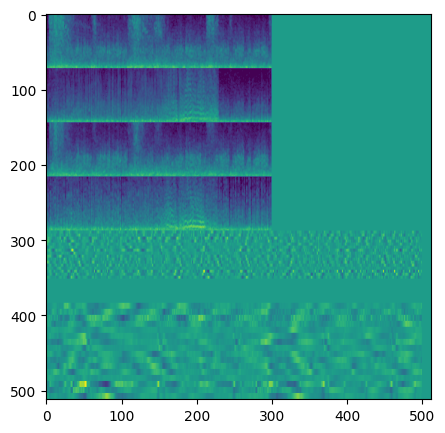

100%|██████████| 1/1 [00:00<00:00,  1.96it/s]


{'lrflip_prob': 1.0, 'fbflip_prob': 0.0, 'mask_prob': 0.0, 'keep_center_ratio': 0.0, 'hflip_prob': 0.0, 'blur_prob': 0.0, 'roll_prob': 0.0, 'neg_eeg_prob': 0.0, 'contrast_prob': 0.0, 'fuse_prob': 0.0, 'block_prob': 0.0, 'noise_prob': 0.0, 'mask_iter': 5, 'mask_size_ratio': 0.15, 'num_block_ch': 4, 'dummy_votes_prob': 0.0, 'num_dummy_votes': 1}
18


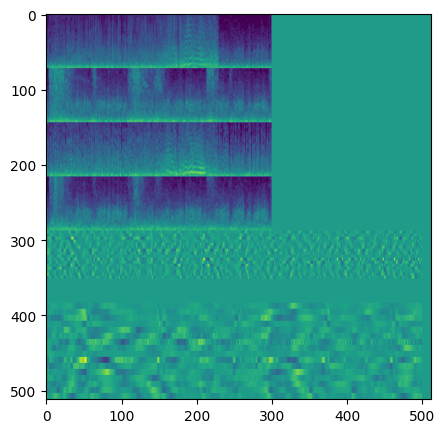

100%|██████████| 1/1 [00:00<00:00,  2.22it/s]


In [2]:
MAXC_LOCAL = True
MAXC_TEST_MODE = False
infer_df_path = "/home/maxc/workspace/kaggle-hms/folds/val_fold_0.csv"

if MAXC_LOCAL:
    dataset_path = (
    "/home/maxc/workspace/kaggle-hms/hms-harmful-brain-activity-classification"
    )
    model_dir_list = [
        "/home/maxc/workspace/kaggle-hms/models-hmsv6-1/hmsv6-maxvits-4imgs-w025-kl1-512"
    ]

    if MAXC_TEST_MODE:
        infer_df_path = "/home/maxc/workspace/kaggle-hms/hms-harmful-brain-activity-classification/test.csv"
    else:
        infer_df_path = "/home/maxc/workspace/kaggle-hms/folds/val_fold_0.csv"

else:
    dataset_path = "/kaggle/input/hms-harmful-brain-activity-classification"
    model_dir_list = [
        "/kaggle/input/hmsv6-convnexts-w025-3imgs-kl1-bandclip-longrawfull"
    ]

    if MAXC_TEST_MODE:
        infer_df_path = "/kaggle/input/hms-harmful-brain-activity-classification/test.csv"
    else:
        infer_df_path = "/kaggle/input/hms-harmful-brain-activity-classification/folds/val_fold_0.csv"

infer_df = pd.read_csv(infer_df_path)
# if not MAXC_TEST_MODE:
#     infer_df = infer_df.head(100)


maxc_subm_df, maxc_subm_logits_df = hms_inference(
    infer_df = infer_df,
    model_dir_list=model_dir_list,
    test_mode=MAXC_TEST_MODE,
    tmp_dir="./tmp",
    input_data_dir=dataset_path,
    verbose=True,
)

In [3]:
print(maxc_subm_df.head())

       eeg_id  eeg_sub_id  seizure_vote  lpd_vote  gpd_vote  lrda_vote  \
0   356835670           0      0.235936  0.547252  0.012950   0.035779   
1   728276850           0      0.007811  0.427534  0.036269   0.178119   
2  1543976471           0      0.005662  0.003341  0.015918   0.014377   
3  1561691174           0      0.024340  0.015531  0.045159   0.012269   
4  1639794967           0      0.826348  0.009818  0.109114   0.006929   

   grda_vote  other_vote  
0   0.014842    0.153242  
1   0.066947    0.283321  
2   0.567806    0.392896  
3   0.063546    0.839155  
4   0.029818    0.017973  


In [4]:
maxc_subm_logits_df.head()

,eeg_id,eeg_sub_id,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,356835670,0,1.538380,2.397923,-1.420527,-0.358419,-1.292282,1.117063
1,728276850,0,-2.060648,1.975510,-0.577085,1.094135,0.079267,1.567310
2,1543976471,0,-1.427180,-1.855573,-0.314978,-0.424460,3.304501,2.936116
3,1561691174,0,-0.325731,-0.814921,0.325533,-0.970365,0.642268,3.321927
4,1639794967,0,3.384966,-1.147521,1.311966,-1.409170,-0.010754,-0.519961


: 